# Problem set 5

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.optimize as sco
import matplotlib.pyplot as plt

In [2]:
file = 'PS_5_Portfolio_Construction_Risk_Management.xlsx'

In [3]:
# import total returns
rets = pd.read_excel(file, sheet_name='total_returns', parse_dates=["date"], index_col='date')
rets.head()

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD,DJCS Hedge Fund USD
date,,,,,,,,,,
1994-01-31,0.011733,-0.005467,-0.016267,0.001433,0.001933,0.105133,0.036533,0.003333,0.012733,0.011133
1994-02-28,-0.025011,0.002106,0.019713,-0.056811,0.011667,-0.011705,-0.001850,0.001188,-0.020346,-0.041240
1994-03-31,-0.039114,-0.002514,0.071827,-0.042854,0.025923,-0.046227,-0.013051,-0.009758,-0.016930,-0.035777
1994-04-29,-0.015720,0.002397,0.012710,-0.016033,0.008437,-0.083673,-0.006673,-0.025332,-0.002165,-0.017542
1994-05-31,0.005550,-0.001229,0.022357,0.037839,0.007497,-0.007453,-0.001604,-0.010329,0.007780,0.022178


In [4]:
# import factors
factors = pd.read_excel(file, sheet_name='factors', parse_dates=["date"], index_col='date')
factors.head()

,RF,Mkt-RF,SMB,HML,UMD
date,,,,,
1994-01-31,0.0025,0.0290,0.0011,0.0215,0.0009
1994-02-28,0.0021,-0.0263,0.0272,-0.0137,-0.0027
1994-03-31,0.0027,-0.0485,-0.0090,0.0129,-0.0131
1994-04-29,0.0027,0.0068,-0.0088,0.0166,0.0039
1994-05-31,0.0032,0.0062,-0.0205,0.0012,-0.0222


In [5]:
# excess returns
xrets = rets.sub(factors.loc[:, "RF"], axis = 0)

# Equally weighted portfolio

In [6]:
weights = np.ones(9) / 9
weights

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

In [7]:
#drop DJCS Hedge Fund USD
rets = rets.drop("DJCS Hedge Fund USD", axis=1)
xrets = xrets.drop("DJCS Hedge Fund USD", axis=1)
xrets.head()

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD
date,,,,,,,,,
1994-01-31,0.009233,-0.007967,-0.018767,-0.001067,-0.000567,0.102633,0.034033,0.000833,0.010233
1994-02-28,-0.027111,0.000006,0.017613,-0.058911,0.009567,-0.013805,-0.003950,-0.000912,-0.022446
1994-03-31,-0.041814,-0.005214,0.069127,-0.045554,0.023223,-0.048927,-0.015751,-0.012458,-0.019630
1994-04-29,-0.018420,-0.000303,0.010010,-0.018733,0.005737,-0.086373,-0.009373,-0.028032,-0.004865
1994-05-31,0.002350,-0.004429,0.019157,0.034639,0.004297,-0.010653,-0.004804,-0.013529,0.004580


In [8]:
portfolio = (xrets * weights).sum(axis=1)
portfolio.head()

date
1994-01-31    0.014289
1994-02-28   -0.011105
1994-03-31   -0.010778
1994-04-29   -0.016705
1994-05-31    0.003512
dtype: float64

In [9]:
# define Sharpe ratio function
def sharpe_ratio(xrets_df):
    
    #annualized volatility
    volatility = xrets_df.std() * np.sqrt(12)
    
    #annualized return
    ann_ret = xrets_df.mean() * 12

    sr = ann_ret / volatility
    
    return sr
    

In [10]:
# define periods
first_period = portfolio.index <= "31-12-2003"
second_period = portfolio.index >= "31-12-2003"

In [11]:
print("1994-2003 SR: ", sharpe_ratio(portfolio.loc[first_period]))
print("2003-20012 SR: ", sharpe_ratio(portfolio.loc[second_period]))
print("full sample SR: ", sharpe_ratio(portfolio))

1994-2003 SR:  1.0683022022858935
2003-20012 SR:  0.4979560778327751
full sample SR:  0.7661663352339293


# Portfolio optimization

In [12]:
# function to ne minimized (negative SR)

def min_sharpe_ratio(weights, xrets):
    
    portfolio = (xrets * weights).sum(axis=1)
    sr = sharpe_ratio(portfolio)
    
    return - sr

In [13]:
# number of assets
n = xrets.shape[1]
n

9

Define bounds for minimization function (should be equal to the niumber of weights)

In [14]:
# tuple of tuples
bounds = tuple((0,1) for i in range(n))
bounds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [15]:
# Define constraints (as dictionary)
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

Initial guess: for instance equal weights portfolio

In [16]:
# try with equal weights
min_sharpe_ratio(weights, xrets.loc[first_period])

-1.0683022022858935

In [17]:
#actual minimizatio function
opts = sco.minimize(min_sharpe_ratio, weights, xrets.loc[first_period],
                   method='SLSQP',
                   bounds=bounds,
                   constraints=cons)

In [18]:
opts

     fun: -2.2550360551832487
     jac: array([ 1.31249428e-03, -3.61800194e-04,  1.42547488e-03, -4.38958406e-04,
        2.47208327e-01,  2.81538409e+00,  1.03583932e-03, -1.18046999e-04,
        4.42595184e-02])
 message: 'Optimization terminated successfully'
    nfev: 108
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([0.04012641, 0.66984384, 0.07194383, 0.00569959, 0.        ,
       0.        , 0.09949473, 0.1128916 , 0.        ])

In [19]:
# extract optimal weights
opt_weights = opts['x']
opt_weights

array([0.04012641, 0.66984384, 0.07194383, 0.00569959, 0.        ,
       0.        , 0.09949473, 0.1128916 , 0.        ])

In [20]:
# compute optimal portfolio returns
optimal_portfolio = (opt_weights * xrets).sum(axis=1)

In [21]:
print("1994-2003 SR: ", sharpe_ratio(optimal_portfolio.loc[first_period]))
print("2003-20012 SR: ", sharpe_ratio(optimal_portfolio.loc[second_period]))
print("full sample SR: ", sharpe_ratio(optimal_portfolio))

1994-2003 SR:  2.2550360551832487
2003-20012 SR:  -0.07477237438670108
full sample SR:  0.34077660866209564


# 5.2 Risk management and drawdown control

In [22]:
# create a rolling volatility table (12 month)
rolling_vol = xrets.shift().rolling(12).std() * np.sqrt(12) #shift!!! cause rolling includes current return

In [23]:
rolling_vol

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD
date,,,,,,,,,
1994-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2012-02-29,0.101889,0.054173,0.182203,0.040854,0.112988,0.112016,0.089952,0.050253,0.017087
2012-03-30,0.104297,0.055238,0.185086,0.040393,0.110157,0.116276,0.090348,0.044936,0.017403
2012-04-30,0.104438,0.054703,0.184745,0.041557,0.110646,0.114238,0.091469,0.044615,0.016163


In [24]:
#fill na with the first available data
rolling_vol = rolling_vol.fillna(method="bfill")

In [25]:
rolling_vol.head()

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD
date,,,,,,,,,
1994-01-31,0.063729,0.023904,0.121047,0.093959,0.056643,0.24474,0.04671,0.033497,0.034054
1994-02-28,0.063729,0.023904,0.121047,0.093959,0.056643,0.24474,0.04671,0.033497,0.034054
1994-03-31,0.063729,0.023904,0.121047,0.093959,0.056643,0.24474,0.04671,0.033497,0.034054
1994-04-29,0.063729,0.023904,0.121047,0.093959,0.056643,0.24474,0.04671,0.033497,0.034054
1994-05-31,0.063729,0.023904,0.121047,0.093959,0.056643,0.24474,0.04671,0.033497,0.034054


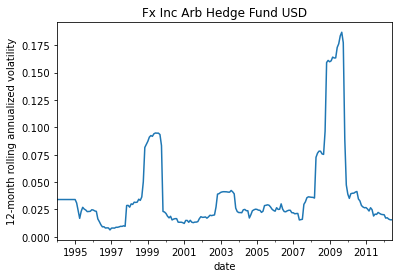

In [26]:
#plot volatility for FX Inc
rolling_vol.loc[:, "Fx Inc Arb Hedge Fund USD"].plot()
plt.title("Fx Inc Arb Hedge Fund USD")
plt.ylabel("12-month rolling annualized volatility")
plt.show()

# Risk-managed strategies (reactive drowdown control)

In [27]:
# cumulative returns without risk management
cum_rets = (1 + rets).cumprod()

# high water mark without risk management
hwm = cum_rets.expanding().max()

# drowdnowns without risk management
dd = (hwm - cum_rets) / hwm

In [28]:
dd

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD
date,,,,,,,,,
1994-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1994-02-28,0.025011,0.000000,0.000000,0.056811,0.000000,0.011705,0.001850,0.000000,0.020346
1994-03-31,0.063147,0.002514,0.000000,0.097231,0.000000,0.057392,0.014877,0.009758,0.036932
1994-04-29,0.077874,0.000123,0.000000,0.111704,0.000000,0.136262,0.021450,0.034843,0.039016
1994-05-31,0.072756,0.001351,0.000000,0.078092,0.000000,0.142700,0.023020,0.044811,0.031539
...,...,...,...,...,...,...,...,...,...
2012-02-29,0.049735,0.371432,0.628099,0.000000,0.059759,0.042333,0.088816,0.000000,0.000000
2012-03-30,0.044985,0.372408,0.633135,0.004271,0.087635,0.049048,0.081651,0.000000,0.000000
2012-04-30,0.049454,0.375005,0.642425,0.006782,0.083713,0.047629,0.083763,0.002381,0.000000


strategy parameter

In [29]:
# scalar 
s = 3.0

In [30]:
# maxim accepatable drowdown
madd = 0.3

In [31]:
# number of month
T = len(cum_rets)
T

222

The risk-managed strategy must be computed iteratively, because the time $t$ investment amount depends on previous returns of the risk-managed strategy. Hence, at each point in time $t$:
<ol>
    <li>Compute invested amount $ x_t = \frac{MADD − DD_t}{3\sigma_t} $ </li>
    <li>Set $x_t$ to 0 if it is smaller than 0</li>
    <li>Set $x_t$ to 1 if it is greater than 1</li>
    <li>Compute realized returns in subsequent period $ r_{t+1}^\text{RM} = r_{t+1}^e \times x_t + r_t^f $</li>
    <li>Compute cumulative return $ P_{t+1} = P_t \times (1 + r_{t+1}^\text{RM}) $ </li>
    <li>Compute high water mark $ HWM_t = max_{s \leq t} P_s $ </li>
    <li>Compute maximum drawdown $ DD_t = \frac{HWM_t - P_t}{HWM_t} $ </li>
</ol>

In [32]:
# copy the results without risk management

In [33]:
dd_rm = dd.copy()
hwm_rm = hwm.copy()
rets_rm = rets.copy()
scalers = dd.copy() * np.nan
cum_rets_rm = cum_rets.copy()

In [71]:
for t in range(1, T):
    # invested amount in period t-1
    x = (madd - dd_rm.iloc[t-1,:]) / (rolling_vol.iloc[t-1,:] * s)
    x.loc[x > 1] = 1
    x.loc[x < 0] = 0
    # write x to DataFrame
    scalers.iloc[t-1,:] = x
    #total returns with a risk management in period t
    rets_rm.iloc[t,:] = (xrets.iloc[t,:] * x) + factors.loc[:,"RF"].iloc[t]
    # cumulative returns with risk management in period t
    cum_rets_rm.iloc[t,:] = cum_rets_rm.iloc[t-1,:] * (1 + rets_rm.iloc[t,:])
    # high water mark in period t
    # use [:t+1, :] !!!!!! as [:t, :] excludes t !!!!
    hwm_rm.iloc[t,:] = cum_rets_rm.iloc[:t+1,:].max()
    # drawdowns with risk management in period t
    dd_rm.iloc[t,:] = (hwm_rm.iloc[t,:] - cum_rets_rm.iloc[t,:]) / hwm_rm.iloc[t,:]

Show the drawdowns of emerging markets with and without drawdown control

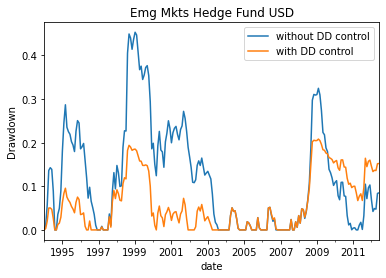

In [74]:
fund_name = "Emg Mkts Hedge Fund USD"
dd.loc[:,fund_name].plot(label="without DD control")
dd_rm.loc[:,fund_name].plot(label="with DD control")
plt.legend()
plt.ylabel("Drawdown")
plt.title(fund_name)
plt.show()

cumulative returns with and without risk management

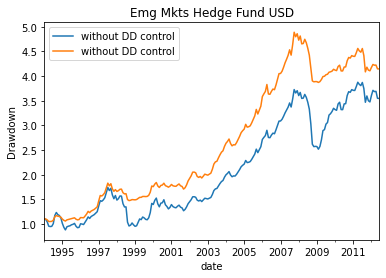

In [75]:
fund_name = "Emg Mkts Hedge Fund USD"
cum_rets.loc[:,fund_name].plot(label="without DD control")
cum_rets_rm.loc[:,fund_name].plot(label="without DD control")
plt.legend()
plt.ylabel("Drawdown")
plt.title(fund_name)
plt.show()

# Performance without drawdown control

In [76]:
# compute performance statistics without risk management
avg_ret = (rets.mean() * 12).map("{:.2%}".format)
max_dd = (dd.max()).map("{:.2%}".format)
sr = round(sharpe_ratio(xrets), 2) #!!!xrets

In [77]:
pd.DataFrame([avg_ret, max_dd, sr], index = ["Avg. return", "Max. DD", "SR"])

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD
Avg. return,9.04%,5.29%,-2.66%,11.51%,6.13%,7.99%,8.83%,7.35%,5.24%
Max. DD,22.14%,45.13%,64.24%,27.00%,17.88%,45.33%,19.30%,33.00%,29.10%
SR,0.61,0.22,-0.34,0.88,0.26,0.33,0.92,0.62,0.38


# Performance without drawdown control

In [78]:
# compute excess returns of risk-managed strategies
xrets_rm = rets_rm.sub(factors.loc[:, "RF"], axis=0)

In [81]:
# compute performance statistics of risk-managed strategy
avg_ret_rm = (rets_rm.mean() * 12).map("{:.2%}".format)
max_dd_rm = (dd_rm.max()).map("{:.2%}".format)
sr_rm = round(sharpe_ratio(xrets_rm), 2) #!!!xrets

In [82]:
pd.DataFrame([avg_ret_rm, max_dd_rm, sr_rm], index=["Avg. return", "Max. DD", "SR"])

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD
Avg. return,8.19%,4.92%,0.46%,10.32%,4.79%,8.10%,7.98%,5.83%,4.45%
Max. DD,17.21%,42.76%,21.88%,13.83%,13.08%,20.83%,17.62%,24.45%,23.06%
SR,0.61,0.19,-0.35,0.99,0.19,0.57,0.82,0.51,0.29
